# Predict The Price of The Books

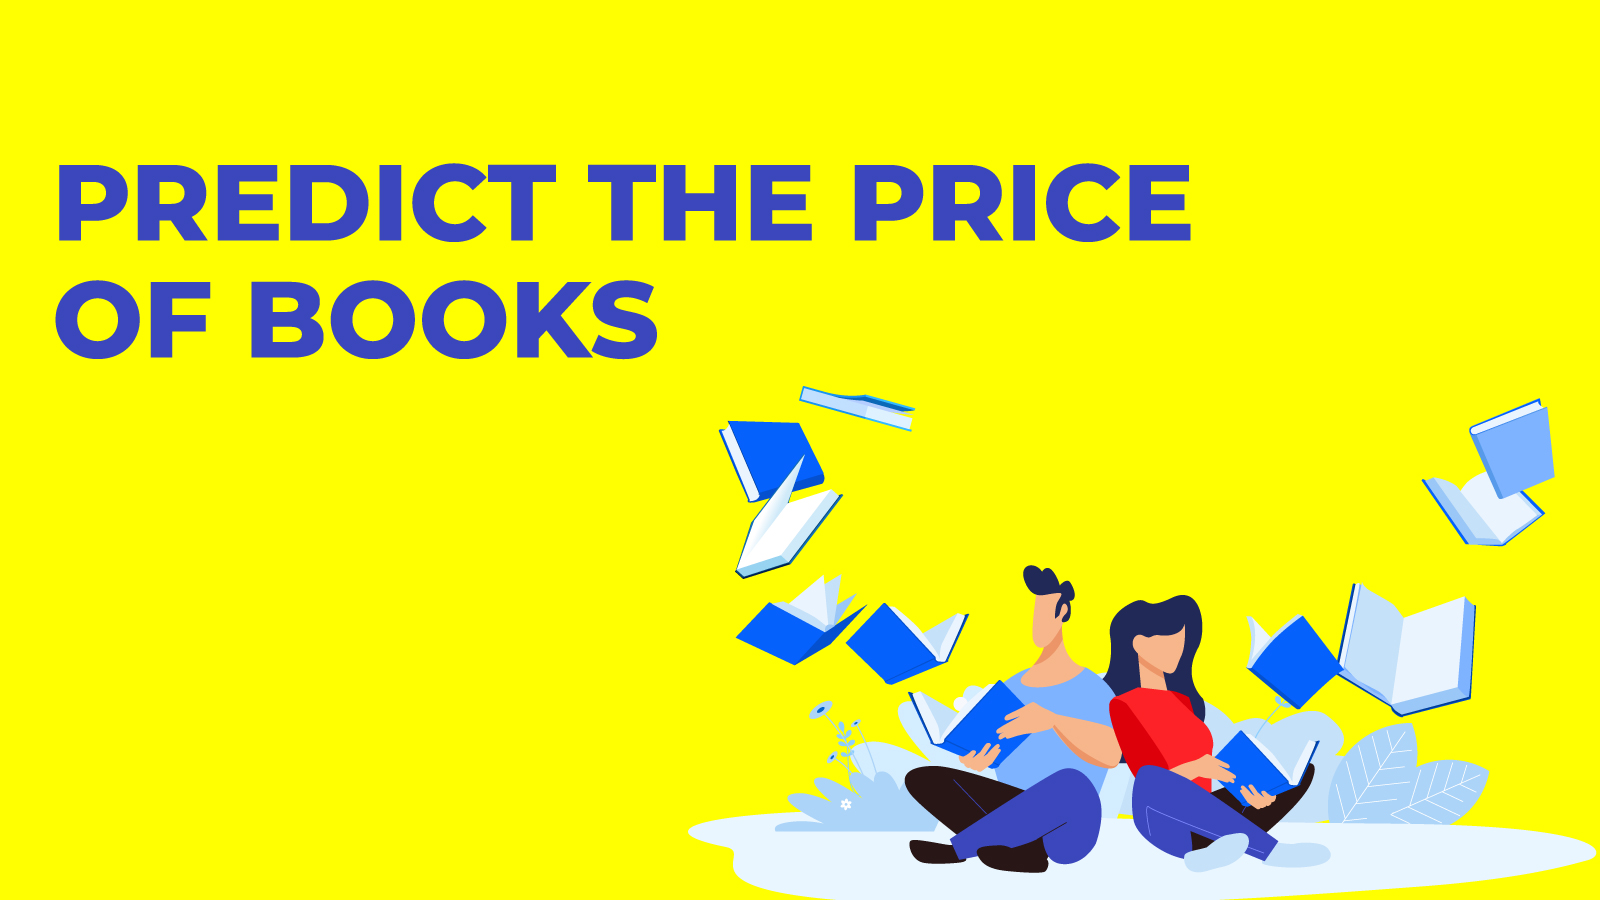

## Problem Statement

The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. Size of training set: 6237 records Size of test set: 1560 records FEATURES: Title: The title of the book Author: The author(s) of the book. Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) Reviews: The customer reviews about the book Ratings: The customer ratings of the book Synopsis: The synopsis of the book Genre: The genre the book belongs to BookCategory: The department the book is usually available at. Price: The price of the book (Target variable)

## Python Dependencies

In [47]:
!py --version

Python 3.10.4


In [48]:
pip list

Package              Version
-------------------- ---------
analytics-python     1.4.0
anyio                3.5.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
Babel                2.9.1
backcall             0.2.0
backoff              1.10.0
beautifulsoup4       4.10.0
bleach               4.1.0
certifi              2021.10.8
cffi                 1.15.0
chardet              4.0.0
charset-normalizer   2.0.12
colorama             0.4.4
cycler               0.11.0
dabl                 0.2.2
debugpy              1.6.0
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
et-xmlfile           1.1.0
executing            0.8.3
fonttools            4.31.2
future               0.18.2
h2o                  3.36.0.4
idna                 3.3
ipykernel            6.11.0
ipython              8.2.0
ipython-genutils     0.2.0
ipywidgets           7.7.0
jedi                 0.18.1
Jinja2               3.1.1
joblib 

## Load Library & Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import mitosheet
import matplotlib.pyplot as plt
from dabl import plot

In [5]:
train = pd.read_excel(r"F:\Hackathon\MachineHack\predict_book_price\Data_Train.xlsx")
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,"THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?\nTHE HUNTERS\nIf you seek, they will find...\n\nThe travels of Marco Polo are known throughout the world.\nBut what if his story isn't complete?\nWhat if his greatest adventure has yet to be discovered?\nGuided by a journal believed to have been dictated by Polo himself,\nthe Hunters set out in search of his final legacy:\nthe mythical treasure gathered during Polo's lifetime of exploration.\nBut as every ancient clue brings them closer to the truth,\neach new step puts them in increasing danger...\nExplosive action. Killer characters. Classic Kuzneski.",Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,"A layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vital part of living itself.\nSelling Points: The original Marathi book won the National Award for Best Book on Cinema (in 1986), now available for the first time in English.\nThe Book: Guru Dutt is now named along with the masters of world cinema—like Orson Welles, Mizoguchi, Hitchcock, Jancso, Ophuls—for his innovative cinematic form and his deep humanism and compassion. In Guru Dutt: A Tragedy in Three Acts, renowned film-maker and scholar Arun Khopkar sheds new light on Dutt’s genius through a close examination of Dutt’s three best-known films—Pyaasa, Kaagaz Ke Phool and Sahib Biwi Aur Ghulam. With a nuanced eye, Khopkar explores the historical context which influenced Dutt’s deeply melancholic style while also analyzing the intricacies of the medium—acting, lighting, music, editing, rhythm—that Dutt carefully deployed to create his masterpieces. Originally written in Marathi, this exquisite English translation paints a layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vital part of living itself.",Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Power to keep them all in awe, they are in that condition which is called Warre""\n\nWritten during the turmoil of the English Civil War, Leviathan is an ambitious and highly original work of political philosophy. Claiming that man's essential nature is competitive and selfish, Hobbes formulates the case for a powerful sovereign—or ""Leviathan""—to enforce peace and the law, substituting security for the anarchic freedom he believed human beings would otherwise experience. This worldview shocked many of Hobbes's contemporaries, and his work was publicly burnt for sedition and blasphemy when it was first published. But in his rejection of Aristotle's view of man as a naturally social being, and in his painstaking analysis of the ways in which society can and should function, Hobbes opened up a whole new world of political science.\n\nBased on the original 1651 text, this edition incorporates Hobbes's own corrections, while also retaining the original spelling and punctuation, to read with vividness and clarity. C. B. Macpherson's introduction elucidates one of the most fascinating works of modern philosophy for the general reader.\n\nFor more than seventy years, Penguin has been the leading publisher of classic literature in the English-speaking world. With more than 1,700 titles, Penguin Classics represents a global bookshelf of the best works throughout history and across genres and disciplines. Readers trust the series to provide auth

In [6]:
test = pd.read_excel(r"F:\Hackathon\MachineHack\predict_book_price\Data_Test.xlsx")
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,"A collection of entire body of work of the Sherlock Holmes Series by Arthur Conan Doyle, 'The Complete Sherlock Holmes: All 4 Novels and 56 Short Stories’ was published way back on October 1, 1986 by RHUS (Deluxe Edition). Since the complete works were published, the collection has only become more popular and has run into several editions after that. Sherlock Holmes is one of the most popular series in crime fiction.\nAll the stories and novels in this book are centered around the famous sleuth Sherlock Holmes and how he solved even the most difficult cases with his remarkable observation techniques, reasoning abilities, towering intellect and knowledge of forensic science.\nMany times, he even had to disguise himself to get to the underlying truth. Although most of his stories are narrated by his friend and biographer Dr. Watson, two had been narrated by Holmes himself while two other stories had been written in third person.\nOften referred to as an 'eccentric’ and 'Bohemian’ by his friend Dr. Watson due to his inability to keep up with his personal hygiene and cleanliness, Holmes is known for trashing myths at a time when modern technologies were still a distant dream.\nThe novels in this collection are The Valley of Fear, The Hound of the Baskervilles, The Sign of Four and A Study in Scarlet. The 56 stories have been divided into five books: the Memoirs of Sherlock Holmes, The Adventures of Sherlock Holmes, the Return of Sherlock Holmes, the Case-Book of Sherlock Holmes and His Last Bow.\nAbout the author:\nA Scottish physician and an eminent writer, Sir Arthur Conan Doyle’s portrayal of Sherlock Holmes, a crime fiction icon in his detective series of the same name is known to be one of the path breaking and classical work in the history of English literature. Doyle’s body of work spans from science fiction and fantasy to poetry, plays, romance, historical novels and even non-fiction.",Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing your applications and running them in production,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,"Enhance your software deployment workflow using containers Key Features Get up-and-running with basic to advanced concepts of Docker Get acquainted with concepts such as Docker containers, Docker images, orchestrators and so on. Practical test-based approach to learning a prominent containerization tool Book DescriptionDocker containers have revolutionized the software supply chain in small and big enterprises. Never before has a new technology so rapidly penetrated the top 500 enterprises worldwide. Companies that embrace containers and containerize their traditional mission-critical applications have reported savings of at least 50% in total maintenance cost and a reduction of 90% (or more) of the time required to deploy new versions of those applications. Furthermore they are benefitting from increased security just by using containers as opposed to running applications outside containers. This book starts from scratch, introducing you to Docker fundamentals and setting up an environment to work with it. Then we delve into concepts such as Docker containers, Docker images, Docker Compose, and so on. We will also cover the concepts of deployment, orchestration, networking, and security. Furthermore, we explain Docker functionalities on public clouds such as AWS. By the end of this book, you will have hands-on experience working with Docker containers and orchestrators such as SwarmKit and Kubernetes. What you will learn Containerize your traditional or microservice-based application Share or ship your application as an immutable container image Build

## Data Cleaning & Feature Engineering

#### Train Dataset

In [7]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,"THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?\nTHE HUNTERS\nIf you seek, they will find...\n\nThe travels of Marco Polo are known throughout the world.\nBut what if his story isn't complete?\nWhat if his greatest adventure has yet to be discovered?\nGuided by a journal believed to have been dictated by Polo himself,\nthe Hunters set out in search of his final legacy:\nthe mythical treasure gathered during Polo's lifetime of exploration.\nBut as every ancient clue brings them closer to the truth,\neach new step puts them in increasing danger...\nExplosive action. Killer characters. Classic Kuzneski.",Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,"A layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vital part of living itself.\nSelling Points: The original Marathi book won the National Award for Best Book on Cinema (in 1986), now available for the first time in English.\nThe Book: Guru Dutt is now named along with the masters of world cinema—like Orson Welles, Mizoguchi, Hitchcock, Jancso, Ophuls—for his innovative cinematic form and his deep humanism and compassion. In Guru Dutt: A Tragedy in Three Acts, renowned film-maker and scholar Arun Khopkar sheds new light on Dutt’s genius through a close examination of Dutt’s three best-known films—Pyaasa, Kaagaz Ke Phool and Sahib Biwi Aur Ghulam. With a nuanced eye, Khopkar explores the historical context which influenced Dutt’s deeply melancholic style while also analyzing the intricacies of the medium—acting, lighting, music, editing, rhythm—that Dutt carefully deployed to create his masterpieces. Originally written in Marathi, this exquisite English translation paints a layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vital part of living itself.",Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Power to keep them all in awe, they are in that condition which is called Warre""\n\nWritten during the turmoil of the English Civil War, Leviathan is an ambitious and highly original work of political philosophy. Claiming that man's essential nature is competitive and selfish, Hobbes formulates the case for a powerful sovereign—or ""Leviathan""—to enforce peace and the law, substituting security for the anarchic freedom he believed human beings would otherwise experience. This worldview shocked many of Hobbes's contemporaries, and his work was publicly burnt for sedition and blasphemy when it was first published. But in his rejection of Aristotle's view of man as a naturally social being, and in his painstaking analysis of the ways in which society can and should function, Hobbes opened up a whole new world of political science.\n\nBased on the original 1651 text, this edition incorporates Hobbes's own corrections, while also retaining the original spelling and punctuation, to read with vividness and clarity. C. B. Macpherson's introduction elucidates one of the most fascinating works of modern philosophy for the general reader.\n\nFor more than seventy years, Penguin has been the leading publisher of classic literature in the English-speaking world. With more than 1,700 titles, Penguin Classics represents a global bookshelf of the best works throughout history and across genres and disciplines. Readers trust the series to provide auth

In [8]:
train.drop(['Synopsis'], axis=1, inplace=True)
train.drop(['Title'], axis=1, inplace=True)
train.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00
1,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00
3,Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62


In [9]:
train[['0','1','2']] = train['Ratings'].str.split(" ", expand= True )

In [10]:
train.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price,0,1,2
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure,220.00,8,customer,reviews
1,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,customer,reviews
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour,299.00,6,customer,reviews
3,Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,customer,reviews
4,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography",965.62,1,customer,review


In [11]:
train.drop(['Ratings'], axis=1, inplace=True)
train.rename(columns={'0': 'Ratings'}, inplace=True)
train.drop(['1'], axis=1, inplace=True)
train.drop(['2'], axis=1, inplace=True)
train.head()

,Author,Edition,Reviews,Genre,BookCategory,Price,Ratings
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,Action & Adventure (Books),Action & Adventure,220.00,8
1,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,International Relations,Humour,299.00,6
3,Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13
4,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,Photography Textbooks,"Arts, Film & Photography",965.62,1


In [12]:
train[['0','1','2','3','4']] = train['Reviews'].str.split(" ", expand= True )

In [13]:
train.head()

,Author,Edition,Reviews,Genre,BookCategory,Price,Ratings,0,1,2,3,4
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,Action & Adventure (Books),Action & Adventure,220.00,8,4.0,out,of,5,stars
1,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,3.9,out,of,5,stars
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,International Relations,Humour,299.00,6,4.8,out,of,5,stars
3,Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,4.1,out,of,5,stars
4,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,Photography Textbooks,"Arts, Film & Photography",965.62,1,5.0,out,of,5,stars


In [14]:
train.drop(['Reviews'], axis=1, inplace=True)
train.rename(columns={'0': 'Reviews'}, inplace=True)
train.drop(['1'], axis=1, inplace=True)
train.drop(['2'], axis=1, inplace=True)
train.drop(['3'], axis=1, inplace=True)
train.drop(['4'], axis=1, inplace=True)
train.head()

,Author,Edition,Genre,BookCategory,Price,Ratings,Reviews
0,Chris Kuzneski,"Paperback,– 10 Mar 2016",Action & Adventure (Books),Action & Adventure,220.00,8,4.0
1,Arun Khopkar,"Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,14,3.9
2,Thomas Hobbes,"Paperback,– 25 Feb 1982",International Relations,Humour,299.00,6,4.8
3,Agatha Christie,"Paperback,– 5 Oct 2017",Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,13,4.1
4,Editors of Life,"Hardcover,– 10 Oct 2006",Photography Textbooks,"Arts, Film & Photography",965.62,1,5.0


In [15]:
train.to_csv("F:\Hackathon\MachineHack\predict_book_price\Train_csv.csv")

#### Test Dataset

In [16]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,"A collection of entire body of work of the Sherlock Holmes Series by Arthur Conan Doyle, 'The Complete Sherlock Holmes: All 4 Novels and 56 Short Stories’ was published way back on October 1, 1986 by RHUS (Deluxe Edition). Since the complete works were published, the collection has only become more popular and has run into several editions after that. Sherlock Holmes is one of the most popular series in crime fiction.\nAll the stories and novels in this book are centered around the famous sleuth Sherlock Holmes and how he solved even the most difficult cases with his remarkable observation techniques, reasoning abilities, towering intellect and knowledge of forensic science.\nMany times, he even had to disguise himself to get to the underlying truth. Although most of his stories are narrated by his friend and biographer Dr. Watson, two had been narrated by Holmes himself while two other stories had been written in third person.\nOften referred to as an 'eccentric’ and 'Bohemian’ by his friend Dr. Watson due to his inability to keep up with his personal hygiene and cleanliness, Holmes is known for trashing myths at a time when modern technologies were still a distant dream.\nThe novels in this collection are The Valley of Fear, The Hound of the Baskervilles, The Sign of Four and A Study in Scarlet. The 56 stories have been divided into five books: the Memoirs of Sherlock Holmes, The Adventures of Sherlock Holmes, the Return of Sherlock Holmes, the Case-Book of Sherlock Holmes and His Last Bow.\nAbout the author:\nA Scottish physician and an eminent writer, Sir Arthur Conan Doyle’s portrayal of Sherlock Holmes, a crime fiction icon in his detective series of the same name is known to be one of the path breaking and classical work in the history of English literature. Doyle’s body of work spans from science fiction and fantasy to poetry, plays, romance, historical novels and even non-fiction.",Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Everything you need to know about containerizing your applications and running them in production,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,"Enhance your software deployment workflow using containers Key Features Get up-and-running with basic to advanced concepts of Docker Get acquainted with concepts such as Docker containers, Docker images, orchestrators and so on. Practical test-based approach to learning a prominent containerization tool Book DescriptionDocker containers have revolutionized the software supply chain in small and big enterprises. Never before has a new technology so rapidly penetrated the top 500 enterprises worldwide. Companies that embrace containers and containerize their traditional mission-critical applications have reported savings of at least 50% in total maintenance cost and a reduction of 90% (or more) of the time required to deploy new versions of those applications. Furthermore they are benefitting from increased security just by using containers as opposed to running applications outside containers. This book starts from scratch, introducing you to Docker fundamentals and setting up an environment to work with it. Then we delve into concepts such as Docker containers, Docker images, Docker Compose, and so on. We will also cover the concepts of deployment, orchestration, networking, and security. Furthermore, we explain Docker functionalities on public clouds such as AWS. By the end of this book, you will have hands-on experience working with Docker containers and orchestrators such as SwarmKit and Kubernetes. What you will learn Containerize your traditional or microservice-based application Share or ship your application as an immutable container image Build

In [17]:
test.drop(['Synopsis'], axis=1, inplace=True)
test.drop(['Title'], axis=1, inplace=True)
test.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,Short Stories (Books),"Crime, Thriller & Mystery"
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,Romance (Books),Romance
3,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,Linguistics (Books),"Language, Linguistics & Writing"


In [18]:
test[['0','1','2']] = test['Ratings'].str.split(" ", expand= True )

In [19]:
test.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,0,1,2
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,Short Stories (Books),"Crime, Thriller & Mystery",960,customer,reviews
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Operating Systems Textbooks,"Computing, Internet & Digital Media",1,customer,review
2,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,Romance (Books),Romance,4,customer,reviews
3,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,Programming & Software Development (Books),"Computing, Internet & Digital Media",11,customer,reviews
4,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,Linguistics (Books),"Language, Linguistics & Writing",9,customer,reviews


In [20]:
test.drop(['Ratings'], axis=1, inplace=True)
test.rename(columns={'0': 'Ratings'}, inplace=True)
test.drop(['1'], axis=1, inplace=True)
test.drop(['2'], axis=1, inplace=True)
test.head()

,Author,Edition,Reviews,Genre,BookCategory,Ratings
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,Short Stories (Books),"Crime, Thriller & Mystery",960
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,Operating Systems Textbooks,"Computing, Internet & Digital Media",1
2,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,Romance (Books),Romance,4
3,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,Programming & Software Development (Books),"Computing, Internet & Digital Media",11
4,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,Linguistics (Books),"Language, Linguistics & Writing",9


In [21]:
test[['0','1','2','3','4']] = test['Reviews'].str.split(" ", expand= True )

In [22]:
test.head()

,Author,Edition,Reviews,Genre,BookCategory,Ratings,0,1,2,3,4
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,Short Stories (Books),"Crime, Thriller & Mystery",960,4.4,out,of,5,stars
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,Operating Systems Textbooks,"Computing, Internet & Digital Media",1,5.0,out,of,5,stars
2,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,Romance (Books),Romance,4,5.0,out,of,5,stars
3,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,Programming & Software Development (Books),"Computing, Internet & Digital Media",11,4.1,out,of,5,stars
4,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,Linguistics (Books),"Language, Linguistics & Writing",9,4.4,out,of,5,stars


In [23]:
test.drop(['Reviews'], axis=1, inplace=True)
test.rename(columns={'0': 'Reviews'}, inplace=True)
test.drop(['1'], axis=1, inplace=True)
test.drop(['2'], axis=1, inplace=True)
test.drop(['3'], axis=1, inplace=True)
test.drop(['4'], axis=1, inplace=True)
test.head()

,Author,Edition,Genre,BookCategory,Ratings,Reviews
0,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",Short Stories (Books),"Crime, Thriller & Mystery",960,4.4
1,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",Operating Systems Textbooks,"Computing, Internet & Digital Media",1,5.0
2,Danielle Steel,"Paperback,– 17 Mar 2011",Romance (Books),Romance,4,5.0
3,Allen B. Downey,"Paperback,– 2016",Programming & Software Development (Books),"Computing, Internet & Digital Media",11,4.1
4,Redman Gairns,"Paperback,– 26 Dec 2011",Linguistics (Books),"Language, Linguistics & Writing",9,4.4


In [24]:
test.to_csv("F:\Hackathon\MachineHack\predict_book_price\Test_csv.csv")

## Exploratory Data Analysis

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Edition       6237 non-null   object 
 2   Genre         6237 non-null   object 
 3   BookCategory  6237 non-null   object 
 4   Price         6237 non-null   float64
 5   Ratings       6237 non-null   object 
 6   Reviews       6237 non-null   object 
dtypes: float64(1), object(6)
memory usage: 341.2+ KB


Target looks like regression


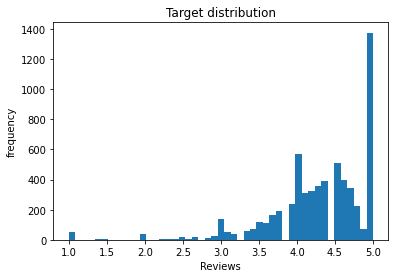

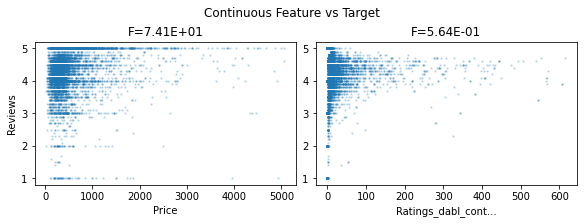

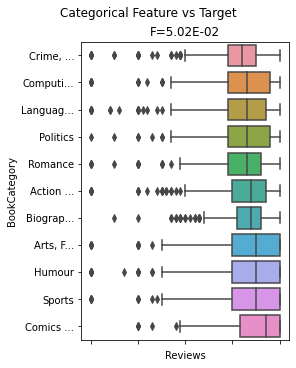

In [28]:
plot(train,'Reviews')
plt.show()

## Model Building

In [34]:
import h2o
from h2o.automl import H2OAutoML
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 13 mins
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.4
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_Lulus_12aedg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.464 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [35]:
train = h2o.import_file("F:\Hackathon\MachineHack\predict_book_price\Train_csv.csv")
test = h2o.import_file("F:\Hackathon\MachineHack\predict_book_price\Test_csv.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
# Identify predictors and response
x = train.columns
y = "Price"
x.remove(y)

In [37]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |█
22:22:18.412: AutoML: XGBoost is not available; skipping it.
22:22:18.414: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
22:22:18.414: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_2_20220402_222218

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 51042.50525757168
RMSE: 225.92588443463418
MAE: 80.68330039234067
RMSLE: 0.27485915136721767
R^2: 0.8928075612860922
Mean Residual Deviance: 51042.50525757168
Null degrees of freedom: 6236
Residual degrees of freedom: 6228
Null deviance: 2969911955.64776
Residual deviance: 318352105.2914746
AIC: 85331.50138752037

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 350680.

In [38]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_4_AutoML_2_20220402_222218,350680,592.182,350680,270.062,nan
StackedEnsemble_BestOfFamily_6_AutoML_2_20220402_222218,351094,592.532,351094,270.475,nan
StackedEnsemble_AllModels_3_AutoML_2_20220402_222218,351694,593.038,351694,271.17,nan
StackedEnsemble_BestOfFamily_4_AutoML_2_20220402_222218,352375,593.612,352375,272.333,nan
StackedEnsemble_AllModels_6_AutoML_2_20220402_222218,353156,594.269,353156,268.691,0.612723
StackedEnsemble_BestOfFamily_5_AutoML_2_20220402_222218,355518,596.253,355518,273.128,0.613275
StackedEnsemble_AllModels_5_AutoML_2_20220402_222218,357537,597.944,357537,271.074,0.610784
StackedEnsemble_BestOfFamily_3_AutoML_2_20220402_222218,363435,602.856,363435,281.658,0.637322
StackedEnsemble_AllModels_2_AutoML_2_20220402_222218,363557,602.957,363557,280.731,nan
DeepLearning_grid_1_AutoML_2_20220402_222218_model_1,363880,603.224,363880,274.208,nan


## The Best Model

In [39]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_2_20220402_222218

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 51042.50525757168
RMSE: 225.92588443463418
MAE: 80.68330039234067
RMSLE: 0.27485915136721767
R^2: 0.8928075612860922
Mean Residual Deviance: 51042.50525757168
Null degrees of freedom: 6236
Residual degrees of freedom: 6228
Null deviance: 2969911955.64776
Residual deviance: 318352105.2914746
AIC: 85331.50138752037

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 350680.10157020984
RMSE: 592.1824900908586
MAE: 270.06174763233804
RMSLE: NaN
R^2: 0.26354995496277056
Mean Residual Deviance: 350680.10157020984
Null degrees of freedom: 6236
Residual degrees of freedom: 6228
Null deviance: 2972187693.915073
Residual deviance: 2187191793.4933987
AIC: 97351.54567303287


## Prediction on Test Dataset

In [40]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [41]:
preds.columns=['Price'] 

In [42]:
preds.head()

Price
363.557
1968.2
433.409
586.281
561.447
595.051
890.731
374.608
354.713
350.661


## Create Submission

In [43]:
submission = preds.as_data_frame(use_pandas=True)

In [44]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1560 non-null   float64
dtypes: float64(1)
memory usage: 12.3 KB


In [45]:
submission.to_csv("F:\Hackathon\MachineHack\predict_book_price\submission.csv")